<a href="https://colab.research.google.com/github/Mirocan17/DSA-210-TERM-PROJECT/blob/main/notebooks/EDA27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

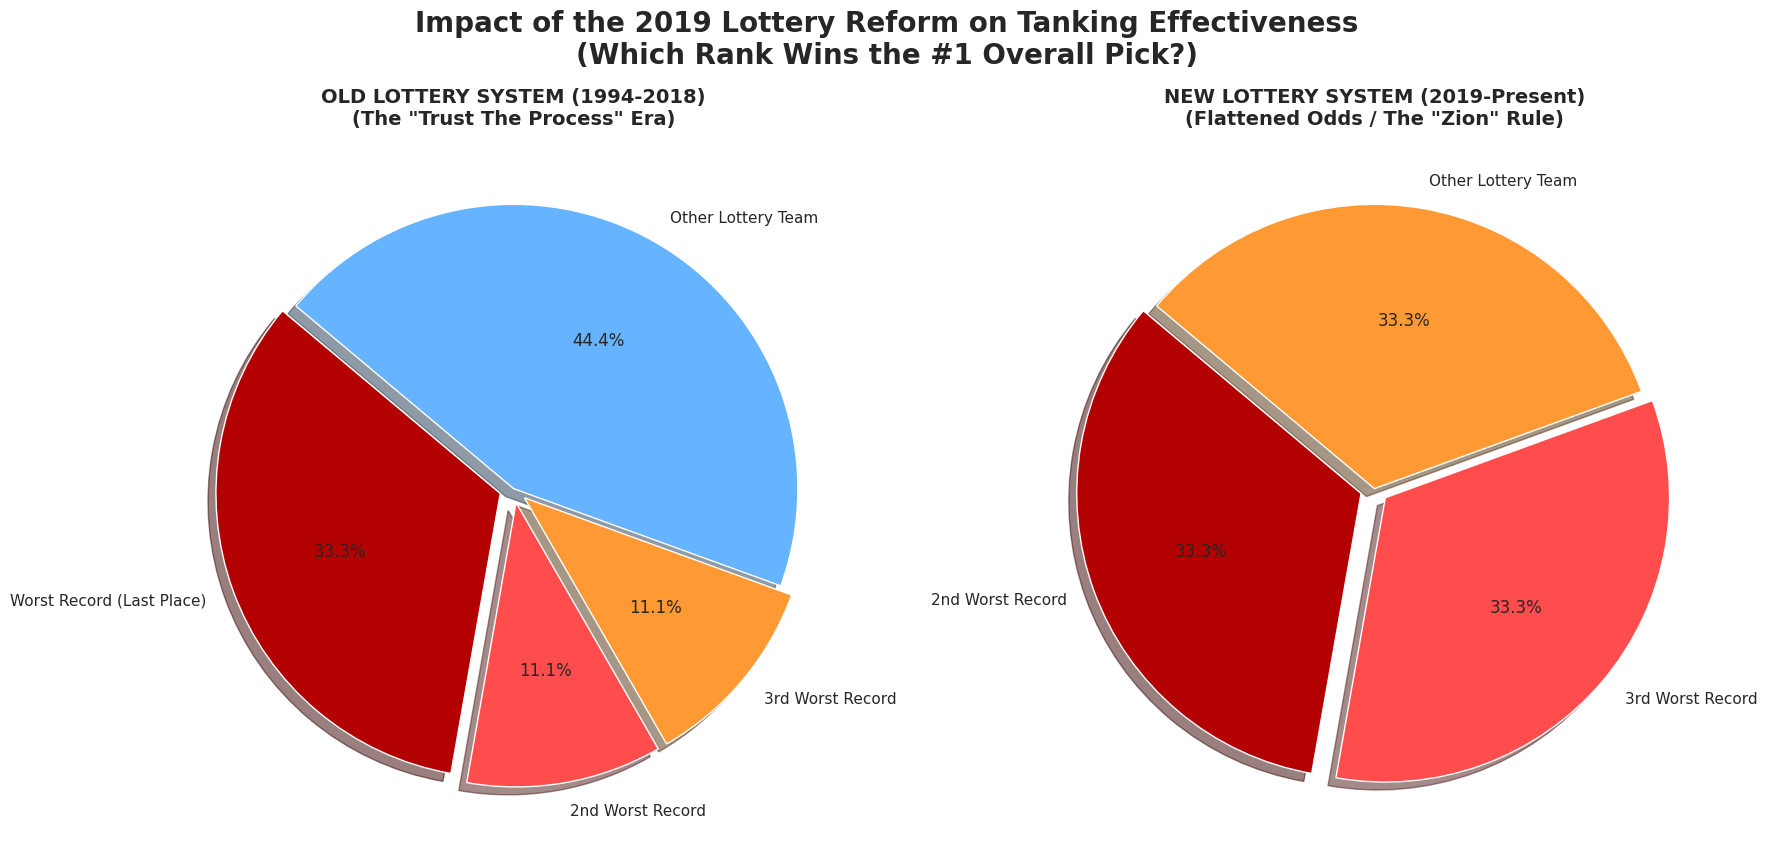

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (16, 8)
try:
    df_draft = pd.read_csv('nba_drafts_1st_round.csv')
    df_standings = pd.read_csv('nba_standings_1994_2025_robust.csv')
    tm_map = {  'MIN': 'Minnesota Timberwolves', 'ORL': 'Orlando Magic', 'WAS': 'Washington Wizards',
        'LAC': 'Los Angeles Clippers', 'GSW': 'Golden State Warriors', 'CLE': 'Cleveland Cavaliers',
        'CHI': 'Chicago Bulls', 'HOU': 'Houston Rockets', 'NJN': 'New Jersey Nets', 'BKN': 'Brooklyn Nets',
        'MIL': 'Milwaukee Bucks', 'NYK': 'New York Knicks', 'TOR': 'Toronto Raptors',
        'POR': 'Portland Trail Blazers', 'SAS': 'San Antonio Spurs', 'PHI': 'Philadelphia 76ers',
        'NOP': 'New Orleans Pelicans', 'NOH': 'New Orleans Hornets', 'CHA': 'Charlotte Bobcats',
        'CHO': 'Charlotte Hornets', 'DET': 'Detroit Pistons', 'PHO': 'Phoenix Suns',
        'BOS': 'Boston Celtics', 'LAL': 'Los Angeles Lakers', 'ATL': 'Atlanta Hawks',
        'UTA': 'Utah Jazz', 'DEN': 'Denver Nuggets', 'MEM': 'Memphis Grizzlies',
        'SAC': 'Sacramento Kings', 'DAL': 'Dallas Mavericks', 'MIA': 'Miami Heat',
        'OKC': 'Oklahoma City Thunder', 'IND': 'Indiana Pacers', 'SEA': 'Seattle SuperSonics',
        'VAN': 'Vancouver Grizzlies' }
    def analyze_era_english(years):
        rank_counts = { 'Worst Record (Last Place)': 0,
            '2nd Worst Record': 0,
            '3rd Worst Record': 0,
            'Other Lottery Team': 0,
            'Playoff Team / Traded Pick': 0 }
        for year in years:
            try:
                season_standings = df_standings[df_standings['Year'] == year].sort_values(by='W', ascending=True).reset_index(drop=True)
                draft_row = df_draft[(df_draft['Year'] == year) & (df_draft['Pk'] == 1)]
                if draft_row.empty: continue
                team_code = draft_row.iloc[0]['Tm']
                team_full = tm_map.get(team_code, team_code)
                if team_full in season_standings['Team'].values:
                    rank_idx = season_standings.index[season_standings['Team'] == team_full][0]
                else:
                    match = season_standings[season_standings['Team'].str.contains(team_full, case=False, na=False)]
                    if not match.empty:
                        rank_idx = match.index[0]
                    else:
                        continue
                if rank_idx == 0: rank_counts['Worst Record (Last Place)'] += 1
                elif rank_idx == 1: rank_counts['2nd Worst Record'] += 1
                elif rank_idx == 2: rank_counts['3rd Worst Record'] += 1
                elif rank_idx < 14: rank_counts['Other Lottery Team'] += 1
                else: rank_counts['Playoff Team / Traded Pick'] += 1
            except:
                continue
        return rank_counts
    era1_counts = analyze_era_english(range(1994, 2019))
    era2_counts = analyze_era_english(range(2019, 2025))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
    colors = ['#b30000', '#ff4d4d', '#ff9933', '#66b3ff', '#cccccc']
    labels1 = [k for k, v in era1_counts.items() if v > 0]
    sizes1 = [v for k, v in era1_counts.items() if v > 0]
    ax1.pie(
        sizes1,
        labels=labels1,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=[0.05 if 'Worst' in l else 0 for l in labels1],
        shadow=True )
    ax1.set_title('OLD LOTTERY SYSTEM (1994-2018)\n(The "Trust The Process" Era)', fontsize=14, fontweight='bold')
    labels2 = [k for k, v in era2_counts.items() if v > 0]
    sizes2 = [v for k, v in era2_counts.items() if v > 0]
    ax2.pie(
        sizes2,
        labels=labels2,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=[0.05 if 'Worst' in l else 0 for l in labels2],
        shadow=True )
    ax2.set_title('NEW LOTTERY SYSTEM (2019-Present)\n(Flattened Odds / The "Zion" Rule)', fontsize=14, fontweight='bold')
    plt.suptitle('Impact of the 2019 Lottery Reform on Tanking Effectiveness\n(Which Rank Wins the #1 Overall Pick?)', fontsize=20, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.savefig('lottery_system_comparison_english.png')
    plt.show()
except Exception as e:
    print(f"Error occurred: {e}")
    print("Please ensure 'nba_drafts_1st_round.csv' and 'nba_standings_1994_2025_robust.csv' are uploaded.")

These 2 graphs shows the comparison between 2 separate lottery systems, before 2018, most of the teams tank because of the high probability of getting the first pick. After 2018, the system has changed and the probability of getting the first pick as a worst team has declined.

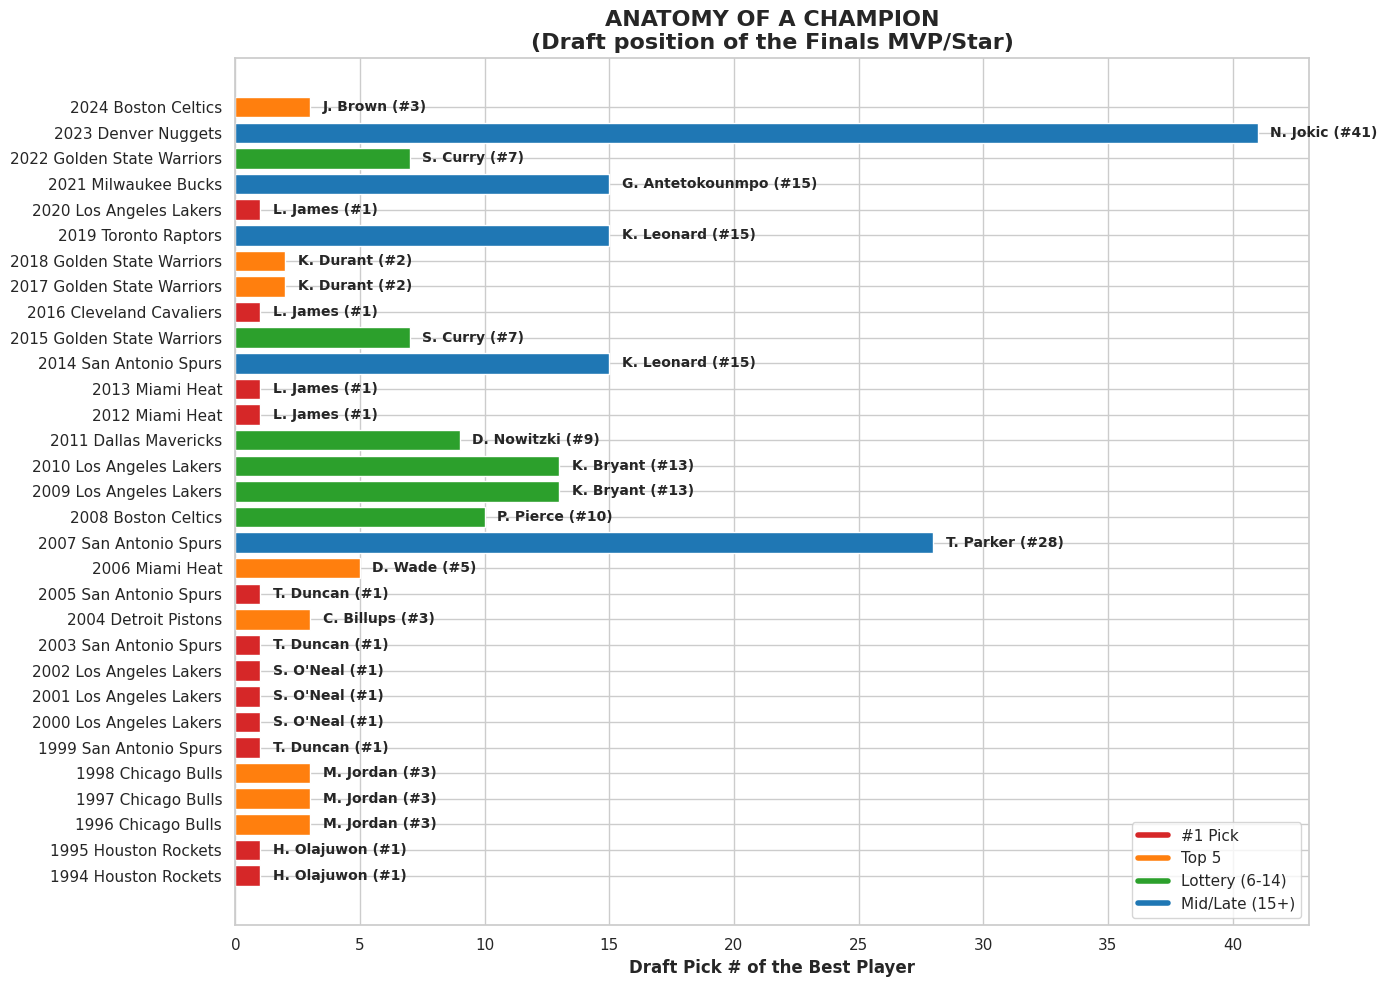

In [8]:
from matplotlib.lines import Line2D
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 11
try:
    df_playoff = pd.read_csv('nba_playoff_outcomes_accurate_v3.csv')
except:
    df_playoff = pd.read_csv('nba_playoff_outcomes_offline_final_v2.csv')
champs_df = df_playoff[df_playoff['Playoff_Finish'] == 'Champion'].copy()
champs_df = champs_df.sort_values(by='Year', ascending=False)
star_player_map = {
    (2024, 'Boston Celtics'): ('J. Brown', 3), (2023, 'Denver Nuggets'): ('N. Jokic', 41),
    (2022, 'Golden State Warriors'): ('S. Curry', 7), (2021, 'Milwaukee Bucks'): ('G. Antetokounmpo', 15),
    (2020, 'Los Angeles Lakers'): ('L. James', 1), (2019, 'Toronto Raptors'): ('K. Leonard', 15),
    (2018, 'Golden State Warriors'): ('K. Durant', 2), (2017, 'Golden State Warriors'): ('K. Durant', 2),
    (2016, 'Cleveland Cavaliers'): ('L. James', 1), (2015, 'Golden State Warriors'): ('S. Curry', 7),
    (2014, 'San Antonio Spurs'): ('K. Leonard', 15), (2013, 'Miami Heat'): ('L. James', 1),
    (2012, 'Miami Heat'): ('L. James', 1), (2011, 'Dallas Mavericks'): ('D. Nowitzki', 9),
    (2010, 'Los Angeles Lakers'): ('K. Bryant', 13), (2009, 'Los Angeles Lakers'): ('K. Bryant', 13),
    (2008, 'Boston Celtics'): ('P. Pierce', 10), (2007, 'San Antonio Spurs'): ('T. Parker', 28),
    (2006, 'Miami Heat'): ('D. Wade', 5), (2005, 'San Antonio Spurs'): ('T. Duncan', 1),
    (2004, 'Detroit Pistons'): ('C. Billups', 3), (2003, 'San Antonio Spurs'): ('T. Duncan', 1),
    (2002, 'Los Angeles Lakers'): ('S. O\'Neal', 1), (2001, 'Los Angeles Lakers'): ('S. O\'Neal', 1),
    (2000, 'Los Angeles Lakers'): ('S. O\'Neal', 1), (1999, 'San Antonio Spurs'): ('T. Duncan', 1),
    (1998, 'Chicago Bulls'): ('M. Jordan', 3), (1997, 'Chicago Bulls'): ('M. Jordan', 3),
    (1996, 'Chicago Bulls'): ('M. Jordan', 3), (1995, 'Houston Rockets'): ('H. Olajuwon', 1),
    (1994, 'Houston Rockets'): ('H. Olajuwon', 1)
}
plot_data = []
for idx, row in champs_df.iterrows():
    key = (row['Year'], row['Team'])
    if key in star_player_map:
        player, pick = star_player_map[key]
        plot_data.append({'Year': row['Year'], 'Team': row['Team'], 'Player': player, 'Pick': pick})
plot_df = pd.DataFrame(plot_data)
if not plot_df.empty:
    plt.figure(figsize=(14, 10))
    colors = ['#d62728' if p == 1 else ('#ff7f0e' if p <= 5 else ('#2ca02c' if p <= 14 else '#1f77b4')) for p in plot_df['Pick']]
    bars = plt.barh(plot_df['Year'].astype(str) + " " + plot_df['Team'], plot_df['Pick'], color=colors)
    plt.xlabel('Draft Pick # of the Best Player', fontsize=12, fontweight='bold')
    plt.title('ANATOMY OF A CHAMPION\n(Draft position of the Finals MVP/Star)', fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()
    for i, bar in enumerate(bars):
        pick = plot_df.iloc[i]['Pick']
        player = plot_df.iloc[i]['Player']
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                 f"{player} (#{pick})", va='center', fontsize=10, fontweight='bold')
    custom_lines = [Line2D([0], [0], color='#d62728', lw=4),
                    Line2D([0], [0], color='#ff7f0e', lw=4),
                    Line2D([0], [0], color='#2ca02c', lw=4),
                    Line2D([0], [0], color='#1f77b4', lw=4)]
    plt.legend(custom_lines, ['#1 Pick', 'Top 5', 'Lottery (6-14)', 'Mid/Late (15+)'], loc='lower right')
    plt.tight_layout()
    plt.show()

One way to look how actually tanking work is to look at the best players of the champions. Because every team in NBA fights for the championship to call themselves successfull.

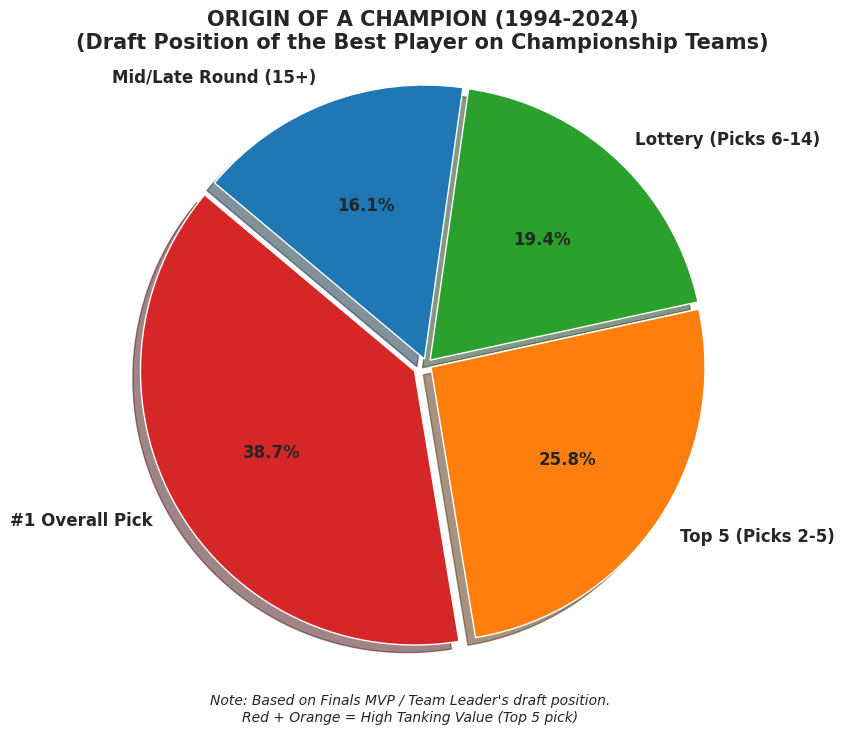

In [6]:
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 10)
star_player_picks = [
    3, 41, 7, 15, 1, 15, 2, 2, 1, 7,  # 2024-2015
    15, 1, 1, 9, 13, 13, 10, 28, 5, 1, # 2014-2005
    3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1    # 2004-1994
]
categories = {
    '#1 Overall Pick': 0,
    'Top 5 (Picks 2-5)': 0,
    'Lottery (Picks 6-14)': 0,
    'Mid/Late Round (15+)': 0
}
for pick in star_player_picks:
    if pick == 1:
        categories['#1 Overall Pick'] += 1
    elif pick <= 5:
        categories['Top 5 (Picks 2-5)'] += 1
    elif pick <= 14:
        categories['Lottery (Picks 6-14)'] += 1
    else:
        categories['Mid/Late Round (15+)'] += 1
labels = list(categories.keys())
sizes = list(categories.values())
colors = ['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4']
explode = (0.05, 0.02, 0.02, 0.02)
plt.figure(figsize=(10, 8))
plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 12, 'weight': 'bold'})
plt.title('ORIGIN OF A CHAMPION (1994-2024)\n(Draft Position of the Best Player on Championship Teams)', fontsize=15, fontweight='bold')
plt.axis('equal')
plt.figtext(0.5, 0.05,
            "Note: Based on Finals MVP / Team Leader's draft position.\nRed + Orange = High Tanking Value (Top 5 pick)",
            ha="center", fontsize=10, style='italic')
plt.show()

This chart shows the relationship between teams best player and the pick that the player is selected.



/tmp/ipython-input-388801773.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='PPG', data=df, order=order, palette=my_pal,


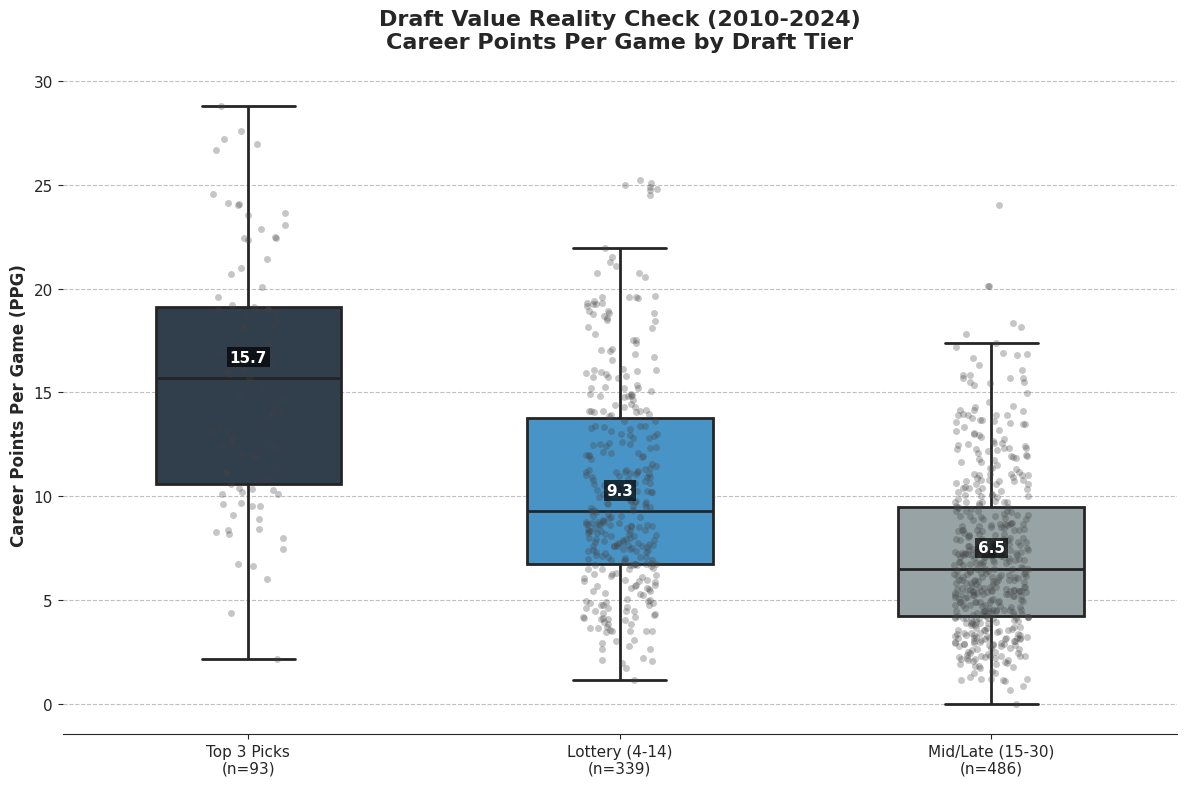

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 11
try:
    df = pd.read_csv('nba_drafts_1st_round (1).csv')
    cols = ['PTS', 'G', 'Pk']
    for c in cols:
        df[c] = pd.to_numeric(df[c], errors='coerce')
    df = df[df['G'] > 0]
    df['PPG'] = df['PTS'] / df['G']
    def get_group(pk):
        if pk <= 3: return 'Top 3 Picks'
        elif pk <= 14: return 'Lottery (4-14)'
        else: return 'Mid/Late (15-30)'
    df['Group_Raw'] = df['Pk'].apply(get_group)
    group_counts = df['Group_Raw'].value_counts()
    def add_count_to_label(group_name):
        count = group_counts.get(group_name, 0)
        return f"{group_name}\n(n={count})"
    df['Group'] = df['Group_Raw'].apply(add_count_to_label)
    unique_labels = df['Group'].unique()
    order = sorted(unique_labels, key=lambda x: 0 if 'Top 3' in x else (1 if 'Lottery' in x else 2))
    fig, ax = plt.subplots(figsize=(12, 8))
    my_pal = {order[0]: "#2c3e50", order[1]: "#3498db", order[2]: "#95a5a6"}
    sns.boxplot(x='Group', y='PPG', data=df, order=order, palette=my_pal,
                width=0.5, linewidth=2, showfliers=False, ax=ax)
    sns.stripplot(x='Group', y='PPG', data=df, order=order,
                  color='#444444', alpha=0.3, size=5, jitter=True, ax=ax)
    medians = df.groupby('Group')['PPG'].median()
    for i, category in enumerate(order):
        med = medians[category]
        ax.text(i, med + 0.8, f'{med:.1f}',
                horizontalalignment='center', size=11, color='white', weight='bold',
                bbox=dict(facecolor='black', alpha=0.7, pad=2, edgecolor='none'))
    ax.set_title('Draft Value Reality Check (2010-2024)\nCareer Points Per Game by Draft Tier',
                 fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('')
    ax.set_ylabel('Career Points Per Game (PPG)', fontsize=12, fontweight='bold')
    ax.yaxis.grid(True, linestyle='--', alpha=0.5, color='gray')
    ax.xaxis.grid(False)
    sns.despine(trim=False, left=True, bottom=False)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"ERROR: {e}")

General idea to visualize the statistics of the picks in the NBA draft. It can be seen that there is a big gap between Q1-Q3 for top 3 picks which shows its risky but if it works there is a high ceiling for that player. In the other graphs, there is a small gap between Q1-median which shows its more guaranteed to get a decent role player from that pick.

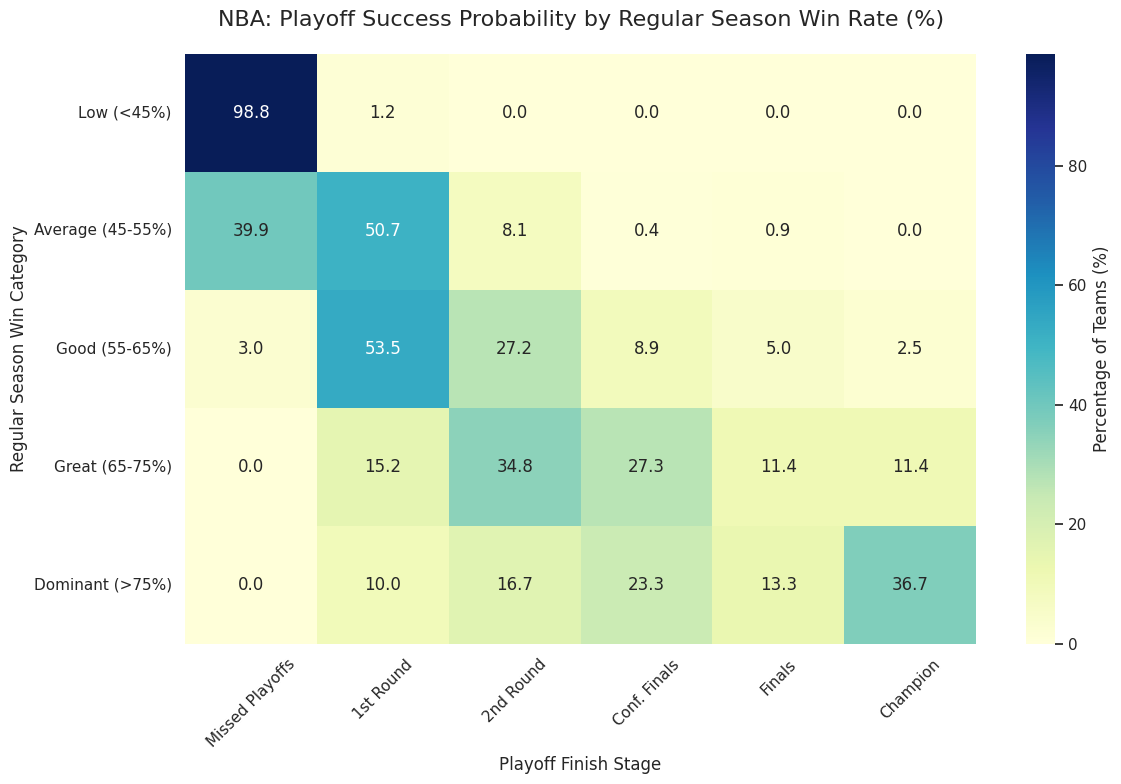

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and merge the data
standings = pd.read_csv('nba_standings_1994_2025_robust.csv')
playoffs = pd.read_csv('nba_playoff_outcomes_accurate_v3.csv')

# Clean W/L% column to numeric
standings['W/L%'] = pd.to_numeric(standings['W/L%'], errors='coerce')

# Merge datasets on Year and Team
df = pd.merge(standings, playoffs[['Year', 'Team', 'Playoff_Finish']], on=['Year', 'Team'], how='inner')

# 2. Define English categories for win rates and the order of playoff finishes
finish_order = ['Missed Playoffs', '1st Round', '2nd Round', 'Conf. Finals', 'Finals', 'Champion']
bins = [0, 0.45, 0.55, 0.65, 0.75, 1.0]
labels = ['Low (<45%)', 'Average (45-55%)', 'Good (55-65%)', 'Great (65-75%)', 'Dominant (>75%)']
df['Win_Category'] = pd.cut(df['W/L%'], bins=bins, labels=labels)

# 3. Create the Probability Table (Normalized by row to get percentages)
pivot_df = pd.crosstab(df['Win_Category'], df['Playoff_Finish'], normalize='index') * 100
pivot_df = pivot_df[finish_order] # Sort columns in logical playoff order

# 4. Plot the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Percentage of Teams (%)'})

# 5. Formatting with English titles and labels
plt.title('NBA: Playoff Success Probability by Regular Season Win Rate (%)', fontsize=16, pad=20)
plt.xlabel('Playoff Finish Stage', fontsize=12)
plt.ylabel('Regular Season Win Category', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('nba_probability_heatmap_english.png')
plt.show()

This visualization analyzes the correlation between NBA regular-season success and playoff outcomes (1994–2024) by merging Standings and Playoff results. It categorizes teams by win percentage to show that while regular-season dominance significantly improves the odds of a deep postseason run, playoff success remains statistically unpredictable.